# Analyzing Textual Data and Social Media

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-20 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.0
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Import nltk

In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Filtering out stopwords, names, and numbers


## Load English stopwords and print some of the words

In [7]:
sw = set(nltk.corpus.stopwords.words('english'))
print("Stop words:", list(sw)[:7])

Stop words: ['am', 'yourselves', 'about', 'o', 'they', 'why', 'because']


## Load Gutenberg corpopra and print some of the filenames

In [9]:
nltk.download('gutenberg')
gb = nltk.corpus.gutenberg
print("Gutenberg files:\n", gb.fileids()[-5:])

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
Gutenberg files:
 ['milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


## Extract sentences from milton-paradise.txt file

In [11]:
nltk.download('punkt')
text_sent = gb.sents("milton-paradise.txt")[:2]
print("Unfiltered:", text_sent)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Unfiltered: [['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I']]


## Filter out the stopwords from extracted sentences

In [13]:
nltk.download('averaged_perceptron_tagger')
for sent in text_sent:
    filtered = [w for w in sent if w.lower() not in sw]
    print("Filtered:\n", filtered)
    tagged = nltk.pos_tag(filtered)
    print("Tagged:\n", tagged)

    words= []
    for word in tagged:
        if word[1] != 'NNP' and word[1] != 'CD':
           words.append(word[0]) 

    print("Words:\n",words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Filtered:
 ['[', 'Paradise', 'Lost', 'John', 'Milton', '1667', ']']
Tagged:
 [('[', 'JJ'), ('Paradise', 'NNP'), ('Lost', 'NNP'), ('John', 'NNP'), ('Milton', 'NNP'), ('1667', 'CD'), (']', 'NN')]
Words:
 ['[', ']']
Filtered:
 ['Book']
Tagged:
 [('Book', 'NN')]
Words:
 ['Book']


# Bag of words model

## Import scikit-learn

In [14]:
import sklearn as sk

## Load two documents from NLTK Gutenberg corpus

In [15]:
hamlet = gb.raw("shakespeare-hamlet.txt")
macbeth = gb.raw("shakespeare-macbeth.txt")

## Create the feature vector by omitting English stopwords

In [16]:
cv = sk.feature_extraction.text.CountVectorizer(stop_words='english')
print("Feature vector:\n", cv.fit_transform([hamlet, macbeth]).toarray())

Feature vector:
 [[ 1  0  1 ... 14  0  1]
 [ 0  1  0 ...  1  1  0]]


## Print a small selection of the features found

In [17]:
print("Features:\n", cv.get_feature_names()[:5])

Features:
 ['1599', '1603', 'abhominably', 'abhorred', 'abide']


# Analyzing word frequencies

In [18]:
import nltk
import string


gb = nltk.corpus.gutenberg
words = gb.words("shakespeare-caesar.txt")

sw = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)
filtered = [w.lower() for w in words if w.lower() not in sw and w.lower() not in punctuation]
fd = nltk.FreqDist(filtered)
print("Words", list(fd.keys())[:5])
print("Counts", list(fd.values())[:5])
print("Max", fd.max())
print("Count", fd['d'])

fd = nltk.FreqDist(nltk.bigrams(filtered))
print("Bigrams", list(fd.keys())[:5])
print("Counts", list(fd.values())[:5])
print("Bigram Max", fd.max())
print("Bigram count", fd[('let', 'vs')])

Words ['tragedie', 'julius', 'caesar', 'william', 'shakespeare']
Counts [2, 1, 190, 1, 1]
Max caesar
Count 0
Bigrams [('tragedie', 'julius'), ('julius', 'caesar'), ('caesar', 'william'), ('william', 'shakespeare'), ('shakespeare', '1599')]
Counts [1, 1, 1, 1, 1]
Bigram Max ('let', 'vs')
Bigram count 16


# Naive Bayesian

In [19]:
import nltk
import string
import random

sw = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

def word_features(word):
   return {'len': len(word)}

def isStopword(word):
    return word in sw or word in punctuation
gb = nltk.corpus.gutenberg
words = gb.words("shakespeare-caesar.txt")

labeled_words = ([(word.lower(), isStopword(word.lower())) for 
word in words])
random.seed(42)
random.shuffle(labeled_words)
print(labeled_words[:5])

featuresets = [(word_features(n), word) for (n, word) in 
labeled_words]
cutoff = int(.9 * len(featuresets))
train_set, test_set = featuresets[:cutoff], featuresets[cutoff:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print("'behold' class", classifier.classify(word_features('behold')))
print("'the' class", classifier.classify(word_features('the')))

print("Accuracy", nltk.classify.accuracy(classifier, test_set))
print(classifier.show_most_informative_features(5))

[('i', True), ('is', True), ('in', True), ('he', True), ('ambitious', False)]
'behold' class False
'the' class True
Accuracy 0.8521671826625387
Most Informative Features
                     len = 7               False : True   =     77.8 : 1.0
                     len = 6               False : True   =     52.2 : 1.0
                     len = 1                True : False  =     51.8 : 1.0
                     len = 2                True : False  =     10.9 : 1.0
                     len = 5               False : True   =     10.9 : 1.0
None


# Sentiment Analysis

In [ ]:
import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy
import string
nltk.download('movie_reviews')
labeled_docs = [(list(movie_reviews.words(fid)), cat)
        for cat in movie_reviews.categories()
        for fid in movie_reviews.fileids(cat)]
random.seed(42)
random.shuffle(labeled_docs)

review_words = movie_reviews.words()
print("# Review Words", len(review_words))

sw = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def isStopWord(word):
    return word in sw or word in punctuation

filtered = [w.lower() for w in review_words if not isStopWord(w.lower())]
print("# After filter", len(filtered))
words = FreqDist(filtered)
N = int(.05 * len(words.keys()))
word_features = list(words.keys())[:N]

def doc_features(doc):
    doc_words = FreqDist(w for w in doc if not isStopWord(w))
    features = {}
    for word in word_features:
        features['count (%s)' % word] = (doc_words.get(word, 0))
    return features

featuresets = [(doc_features(d), c) for (d,c) in labeled_docs]
train_set, test_set = featuresets[200:], featuresets[:200]
classifier = NaiveBayesClassifier.train(train_set)
print("Accuracy", accuracy(classifier, test_set))

print(classifier.show_most_informative_features())

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
# Review Words 1583820


# Creating Word Clouds

In [ ]:
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import FreqDist
import string

sw = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def isStopWord(word):
    return word in sw or word in punctuation
review_words = movie_reviews.words()
filtered = [w.lower() for w in review_words if not isStopWord(w.lower())]

words = FreqDist(filtered)
N = int(.01 * len(words.keys()))
tags = list(words.keys())[:N]

for tag in tags:
    print(tag, ':', words[tag])

In [2]:
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
import pandas as pd
import numpy as np
import string
nltk.download('names')
sw = set(stopwords.words('english'))
punctuation = set(string.punctuation)
all_names = set([name.lower() for name in names.words()])

def isStopWord(word):
    return (word in sw or word in punctuation) or not word.isalpha() or word in all_names

review_words = movie_reviews.words()
filtered = [w.lower() for w in review_words if not isStopWord(w.lower())]

words = FreqDist(filtered)

texts = []

for fid in movie_reviews.fileids():
    texts.append(" ".join([w.lower() for w in movie_reviews.words(fid) if not isStopWord(w.lower()) and words[w.lower()] > 1]))

vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(texts)
sums = np.array(matrix.sum(axis=0)).ravel()

ranks = []

for word, val in zip(vectorizer.get_feature_names(), sums):
    ranks.append((word, val))

df = pd.DataFrame(ranks, columns=["term", "tfidf"])
df = df.sort_values(['tfidf'])
print(df.head())

N = int(.01 * len(df))
df = df.tail(N)

for term, tfidf in zip(df["term"].values, df["tfidf"].values):
    print(term, ":", tfidf)

NameError: name 'nltk' is not defined

# Social Network Analysis

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
print([s for s in dir(nx) if s.endswith('graph')])
G = nx.davis_southern_women_graph()
plt.hist(list(nx.degree(G).values()))
plt.show()

['LCF_graph', 'adjacency_graph', 'barabasi_albert_graph', 'barbell_graph', 'binomial_graph', 'bull_graph', 'caveman_graph', 'chordal_cycle_graph', 'chvatal_graph', 'circulant_graph', 'circular_ladder_graph', 'complete_bipartite_graph', 'complete_graph', 'complete_multipartite_graph', 'connected_caveman_graph', 'connected_watts_strogatz_graph', 'cubical_graph', 'cycle_graph', 'cytoscape_graph', 'davis_southern_women_graph', 'dense_gnm_random_graph', 'desargues_graph', 'diamond_graph', 'digraph', 'directed_havel_hakimi_graph', 'dodecahedral_graph', 'dorogovtsev_goltsev_mendes_graph', 'duplication_divergence_graph', 'edge_subgraph', 'ego_graph', 'empty_graph', 'erdos_renyi_graph', 'expected_degree_graph', 'extended_barabasi_albert_graph', 'fast_gnp_random_graph', 'florentine_families_graph', 'frucht_graph', 'gaussian_random_partition_graph', 'general_random_intersection_graph', 'geographical_threshold_graph', 'gn_graph', 'gnc_graph', 'gnm_random_graph', 'gnp_random_graph', 'gnr_graph', 'g

AttributeError: 'DegreeView' object has no attribute 'values'

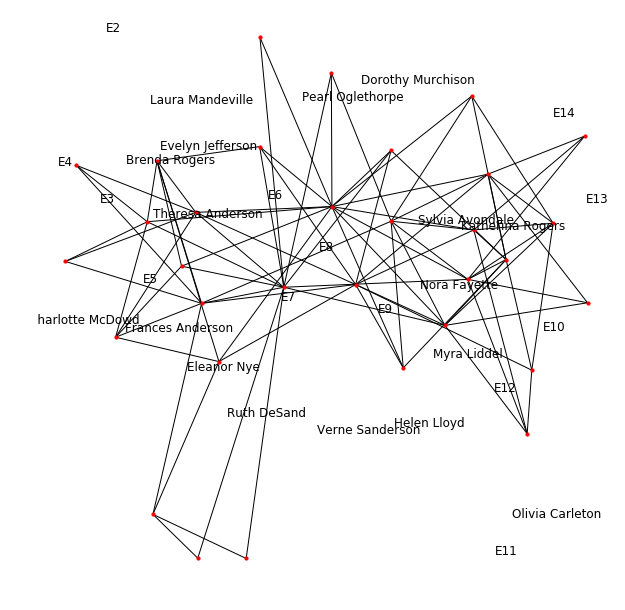

In [4]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw(G, node_size=10)
nx.draw_networkx_labels(G, pos)
plt.show()

In [5]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, node_size=2)
nx.draw(G)
nx.draw_networkx_labels(G, pos)
plt.show()

TypeError: fruchterman_reingold_layout() got an unexpected keyword argument 'node_size'